# introduzione all'esercizio 7

Nell'esercizio 7 siamo nel contesto dell'insieme canonico.  
Utilizzando l'algoritmo di metropolis si usa la statistica di Boltzmann per calcolare le variabili macroscopiche di un sistema a $N=108$ particelle.  
La funzione T(x|y) usata dall'algoritmo di metropolis è uno spostamento dalla posizione precedente con distribuzione uniforme tra $-\Delta$ e $\Delta$, dove $\Delta$ è un parametro dato come input che ho scelto in modo da avere un'accettazione il più vicina possibile a 0.5.

In ogni esercizio nella cartella corrispondente l'esecuzione dei file: esecuzione.py rende automatica la compilazione e il salvataggio dei file necessari di tutte le fasi indagate.  
(l'esecuzione.py presente nella cartella: "es7" è quello corrispondente all'esercizio 7.2)

# 7.1


Sono state aggiunte le correzioni ad energia potenziale per particella e alla pressione usando le formule:  
$\frac{\langle V^*\rangle_{tail}}{N}=8 \pi \rho^* (\frac{1 }{9 {r_c^*}^9}-\frac{1}{3{r_c^*}^3})$  
${p_{tail}}^*=32 \pi {\rho^*}^2 (\frac{1}{9 {r_c^*}^9}-\frac{1}{6{r_c^*}^3})$  
Da notare che la seconda formula differisce da quella riportata nelle slides per un fattore $\rho^*$. Facendo i calcoli io ho infatti trovato questa formula e ho quindi assunto che vi fosse stato un errore nel riportare la formula nelle slides.  
(ho anche cercato online per confermare l'esattezza della formula: https://physics.stackexchange.com/questions/779588/derivation-of-pressure-correction-term-in-lennard-jones-fluid-simulation)

# 7.2

Dopo avere salvato in un file il valore di $\frac{V^*}{N}$ capionato ad ogni step, sono interessato a capire se alcuni tra questi dati sono tra loro correlati e quali invece possono essere considerati come misure indipendenti.

## salvataggio dati

In [4]:
# immagazzinamento dati

import matplotlib.pyplot as plt
import numpy as np


titol=["solido","liquido","gas"]
propiet="potential_energy"
ERR=[]
X=[]
Y=[]
Y_AV=[]

for i in titol:
	with open(f"./../{i}/{propiet}.dat", 'r') as f:
		righe=f.read().split("\n")
		# print(righe)
		err=[]
		x=[]
		y=[]
		y_av=[]
		for l in righe:
			if(l!=""):
				try:
					# print(l.split("\t"))
					a,b,c,d=l.split() #split() separa se ho cose tra 1 o più spazi vuoti
					# print(i)
					x.append(int(a))
					y.append(float(b))
					y_av.append(float(c))
					err.append(float(d))
					# print(d)
				except ValueError:
					print(f"Il valore '{l}' non può essere convertito in float.")
	X.append(x)
	Y.append(y)
	Y_AV.append(y_av)
	ERR.append(err)

# print(len(X[0]))

# print(Y[0][0])
# print(Y[1][0])
# print(X[1][1])

Il valore '    # BLOCK:          ACTUAL_PE:              PE_AVE:              ERROR:' non può essere convertito in float.
Il valore '    # BLOCK:          ACTUAL_PE:              PE_AVE:              ERROR:' non può essere convertito in float.
Il valore '    # BLOCK:          ACTUAL_PE:              PE_AVE:              ERROR:' non può essere convertito in float.


## 7.2.1

Produco il grafico della funzione di correlazione associata alla misura di $\frac{V^*}{N}$. Nell'asse x del grafico vi è il tempo che è tale per cui la differenza fra due step della simulazione è pari a 1.  
Il grafico è stato fatto sfruttando la formula della funzione di autocorrezione di una osservabile x(t) campionata a tempi t discreti:  
$$\chi(t)=\frac{\frac{1}{t_{max}-t}\sum^{t_{max}-t}_{t'=0}x(t')x(t'+t)-(\frac{1}{t_{max}-t})^2 [ \sum^{t_{max}-t}_{t'=0}x(t') ] [\sum^{t_{max}-t}_{t'=0}x(t'+t)]}{\frac{1}{t_{max}}\sum^{t_{max}}_{t'=0}x^2(t') - (\frac{1}{t_{max}}\sum^{t_{max}-t}_{t'=0}x(t'))^2}$$

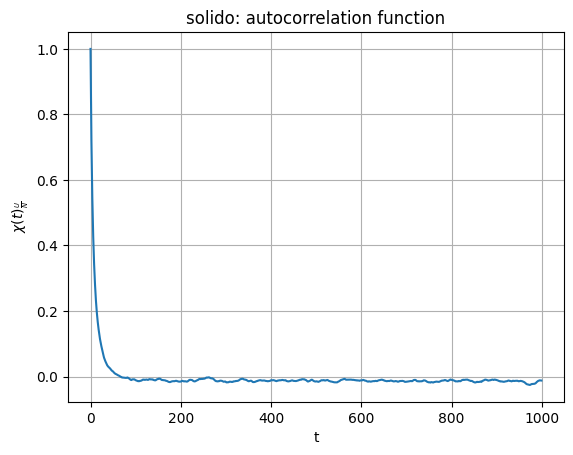

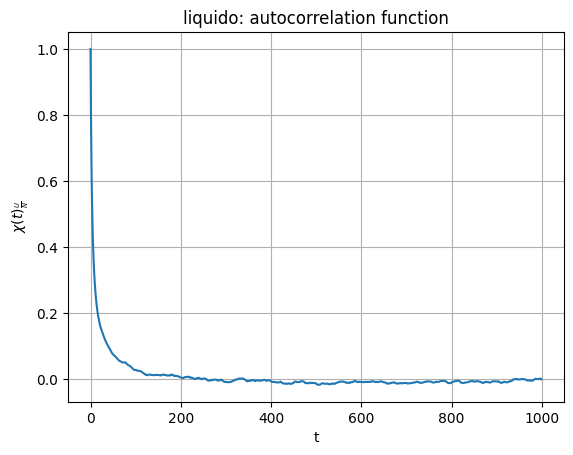

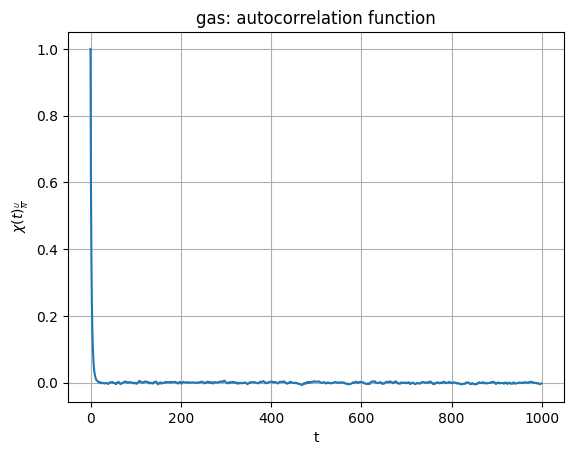

In [5]:
# da eseguire dopo il salvataggio dati

#t va da 0 a 499999

tmax=len(X[0])-1 #499999

# def somma1(m,t_):
# 	S1=[0]*len(X[0])
# 	i=0
# 	S1[0]=
# 	while(i<=tmax):
# 		if(i!=0):
# 			S1[i]=S1[i-1]+m[i]*m[i+t_]
# 			acc+=m[i]
# 		i+=1

def somma1(m,t_):
	acc=0
	i=0
	# print(tmax)
	while(i<=(tmax-t_)):
		acc+=m[i]*m[i+t_]
		i+=1
	return acc

def somma2(m,t_):
	acc=0
	i=0
	while(i<=(tmax-t_)):
		acc+=m[i]
		i+=1
	return acc
	
def somma3(m,t_):
	acc=0
	i=0
	while(i<=(tmax-t_)):
		acc+=m[i+t_]
		i+=1
	return acc

def somma4(m):
	acc=0
	i=0
	while(i<=tmax):
		acc+=(m[i]**2)
		i+=1
	return acc

def somma5(m):
	acc=0
	i=0
	while(i<=tmax):
		acc+=m[i]
		i+=1
	return acc

# print(somma1(Y[j],0))

max=999 #massima t plottata

for j in range(len(titol)):
	chi=[0]*(max+1) # non grafico quando t=tmax perchè la formula diverge
	vet_t=[]
	# while((t_<tmax-X[i])<)
	# for k in len(Y):
	S4=somma4(Y[j])
	S5=somma5(Y[j])
	for t in range(max+1):
		# print(t)
		chi[t]=(float(tmax)/(tmax-t))*(somma1(Y[j],t)-((1./float(tmax-t))*somma2(Y[j],t)*somma3(Y[j],t)))/float(S4-((1./tmax)*(S5**2)))
		vet_t.append(t)
	plt.plot(vet_t,chi)
	plt.title(titol[j]+": autocorrelation function")
	plt.xlabel('t')
	plt.ylabel(r'$\chi(t)_{\frac{U}{N}}$')
	plt.grid(True)
	plt.show()
#Y[i] è l'osservabile di cui calcolo l'autocorrelazione



In ognuno di questi grafici vediamo che vi è un tempo (tempo di correlazione) a partire dal quale la funzione di autocorrelazione si stabilizza a valori prossimi a 0

Convenzionalmente i dati si considerano scorrelati se presi ad almeno 2 volte il tempo di correlazione.

In [1]:
# import matplotlib.pyplot as plt
# import numpy as np


# with open("./NSL_SIMULATOR/OUTPUT/potential_energy.dat", 'r') as f:
# 	righe=f.read().split("\n")
# 	# print(righe)
# 	err=[]
# 	x=[]
# 	y=[]
# 	y_av=[]
# 	for i in righe:
# 			if(i!=""):
# 				try:
# 					# print(i.split("\t"))
# 					a,b,c,d=i.split() #split() separa se ho cose tra 1 o più spazi vuoti
# 					# print(i)
# 					x.append(int(a))
# 					y.append(float(b))
# 					y_av.append(float(c))
# 					err.append(float(d))
# 				except ValueError:
# 					print(f"Il valore '{i}' non può essere convertito in float.")
# plt.errorbar(x,y_av,err)
# plt.xlabel('#blocks')
# plt.ylabel(r'$\frac{<U>}{N}$')
# plt.grid(True)
# plt.show()



## 7.2.2

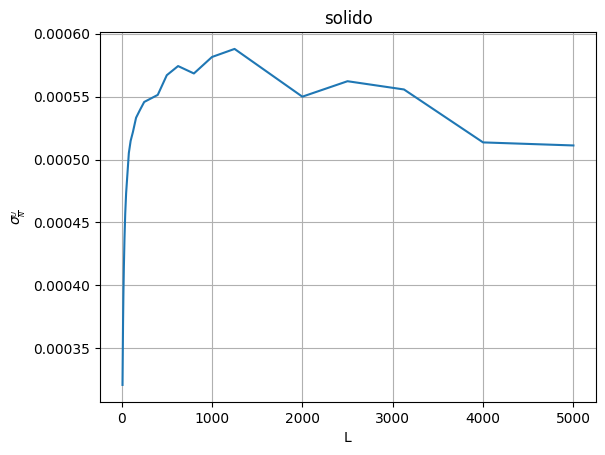

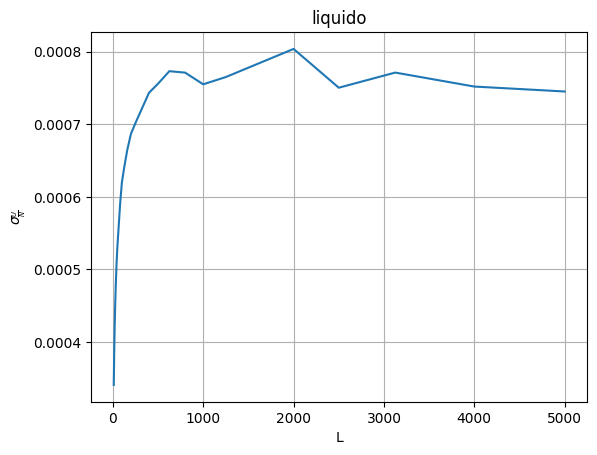

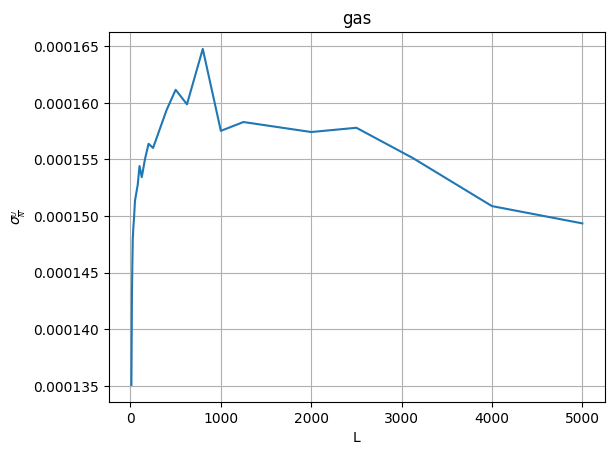

In [6]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

divisor=[10, 16, 20, 25, 32, 40, 50, 80, 100, 125, 160, 200, 250, 400, 500, 625, 800, 1000, 1250, 2000, 2500, 3125, 4000, 5000]


def error_(AV,AV2,n):  # Function for statistical uncertainty estimation
	if n==0:
		return 0
	else:
		return math.sqrt((AV2 - AV**2)/n)



titol=["solido","liquido","gas"]

# se scommento questa parte di codice vedo l'andamento nel caso  considero L non perforza divisore intero di M

# for k in range(len(titol)):
# 	x_graf=[]
# 	y_graf=[]
# 	L=0                   # Number of throws in each block
# 	M=len(X[0])              # Total number of throws
# 	while(L<5000):
# 		L+=10
# 		x_graf.append(L)
# 		N=int(M/L)            # numero di blocchi che considero
# 		sum_prog = 0
# 		su2_prog = 0
# 		err_prog = 0

# 		# non considero l'ultimo blocco di dati se questo ha meno di L elementi
# 		for i in range(N): # mi muovo da un blocco all'altro
# 			sum1 = 0
# 			for j in range(L): # mi muovo da un elemento di un blocco all'altro
# 				elem = j+i*L 
# 				sum1 += Y[k][elem]
# 			ave = sum1/float(L)
# 			sum_prog+=ave
# 			su2_prog+=ave**2
# 		sum_prog/=float(N)
# 		su2_prog/=float(N)
# 		err_prog = error_(sum_prog,su2_prog,N)
# 		y_graf.append(err_prog)
# 	plt.plot(x_graf,y_graf)
# 	plt.title(titol[k])
# 	plt.xlabel('L')
# 	plt.ylabel(r'$\sigma_{\frac{U}{N}}$')
# 	plt.grid(True)
# 	plt.show()
	
for k in range(len(titol)):
	x_graf=[]
	y_graf=[]                   # Number of throws in each block
	M=len(X[0])              # Total number of throws
	for div in divisor:
		L=div
		x_graf.append(L)
		N=int(M/L)            # numero di blocchi che considero
		sum_prog = 0
		su2_prog = 0
		err_prog = 0
		for i in range(N): # mi muovo da un blocco all'altro
			sum1 = 0
			for j in range(L): # mi muovo da un elemento di un blocco all'altro
				elem = j+i*L 
				sum1 += Y[k][elem]
			ave = sum1/float(L)
			sum_prog+=ave
			su2_prog+=ave**2
		sum_prog/=float(N)
		su2_prog/=float(N)
		err_prog = error_(sum_prog,su2_prog,N)
		y_graf.append(err_prog)
	plt.plot(x_graf,y_graf)
	plt.title(titol[k])
	plt.xlabel('L')
	plt.ylabel(r'$\sigma_{\frac{U}{N}}$')
	plt.grid(True)
	plt.show()

Se i blocchi sono più brevi di un tempo caratteristico si nota che la stima dell'errore è molto bassa.  
Questo non è dovuto a una migliore stima di $\frac{\langle V^*\rangle}{N}$ ma alla presenza di correlazione tra i dati che è sempre presente a brevi tempi quando si campiona usando l'algoritmo di metropolis.  
Ad un certo punto l'errore smette di crescere ma si stabilizza attorno ad un certo valore, quello è il segno che io necessito di usare blocchi con un L almeno pari a quel valore in quanto significa che i miei blocchi sono correlati solo superficialmente e quindi le stime ottenute a partire da ogni blocco sono considerabili come scorrelate.

Basandomi su questi grafici posso dire che i blocchi necessitano di essere composti da almeno 1000 steps.  
Per essere sicuro di non avere correlazioni nei prossimi esercizi uso 2000 step ogni blocco (circa 10 volte il tempo di correlazione maggiore)